In [1]:
import pandas as pd
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
# Load CSV dataset
# df=pd.read_csv("/content/HousePriceDataset (1).csv")
# Load CSV in YW 
df=pd.read_csv("HousePriceDataset.csv")
print(f"Number of houses in dataset: {len(df)}")
print(f"Number of variables in dataset: {len(df.columns)}")
df=df.drop(columns=['Unnamed: 0'])
# Display the column names (features) in the dataset
print(f"Features in the dataset: {list(df.columns)}")

# Display basic statistics for numerical columns
print("\nSummary Statistics:")
print(df.describe())

# Check for missing values in the dataset
print("\nMissing Values:")
print(df.isnull().sum())

# Display data types of each column
print("\nData Types:")
print(df.dtypes)

Number of houses in dataset: 21613
Number of variables in dataset: 21
Features in the dataset: ['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']

Summary Statistics:
                 id         price      bedrooms     bathrooms   sqft_living  \
count  2.161300e+04  2.161300e+04  21613.000000  21613.000000  21613.000000   
mean   4.580302e+09  5.400881e+05      3.370842      2.114757   2079.899736   
std    2.876566e+09  3.671272e+05      0.930062      0.770163    918.440897   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.123049e+09  3.219500e+05      3.000000      1.750000   1427.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.90000

In [2]:
### Clean the data  'sqft_lot15'
def clean_data(value):
    if isinstance(value, str) and value.startswith("b'"):
        return float(value[2:-1])
    return float(value)

df['sqft_lot15'] = df['sqft_lot15'].apply(clean_data)

In [3]:
X = df.drop(['price','id'], axis=1)

In [4]:
y = df['price']

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap.umap_ as umap

/Users/wangyuhang/Documents/荷兰课程/Semester-3/IML/Final_Assignment/IML/lib/python3.7/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [8]:
tsne = TSNE(n_components=2, random_state=42, learning_rate='auto')
X_tsne = tsne.fit_transform(X_scaled)

/Users/wangyuhang/Documents/荷兰课程/Semester-3/IML/Final_Assignment/IML/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


In [13]:
reducer = umap.UMAP(n_neighbors=100, tqdm_kwds={'bar_format': '{desc}: {percentage:3.0f}%| {bar} {n_fmt}/{total_fmt} [{elapsed}]', 'desc': 'Epochs completed', 'disable': True})
X_umap = reducer.fit_transform(X_scaled)

In [14]:
from sklearn.cluster import KMeans

# clustering on original dataset
kmeans_orig = KMeans(n_clusters=3, random_state=42)
clusters_orig = kmeans_orig.fit_predict(X_scaled)

# clustering on reduced dataset by pca
kmeans_pca = KMeans(n_clusters=3, random_state=42)
clusters_pca = kmeans_pca.fit_predict(X_pca)


In [15]:
# clustering on reduced dataset by tsne
kmeans_tsne = KMeans(n_clusters=3, random_state=42)
clusters_tsne = kmeans_tsne.fit_predict(X_tsne)

In [16]:
# clustering on reduced dataset by tsne
kmeans_umap = KMeans(n_clusters=3, random_state=42)
clusters_umap = kmeans_umap.fit_predict(X_umap)

In [25]:
reduced_data = {
    'original': clusters_orig,
    'pca': clusters_pca,
    'tsne': clusters_tsne,
    'umap': clusters_umap
}

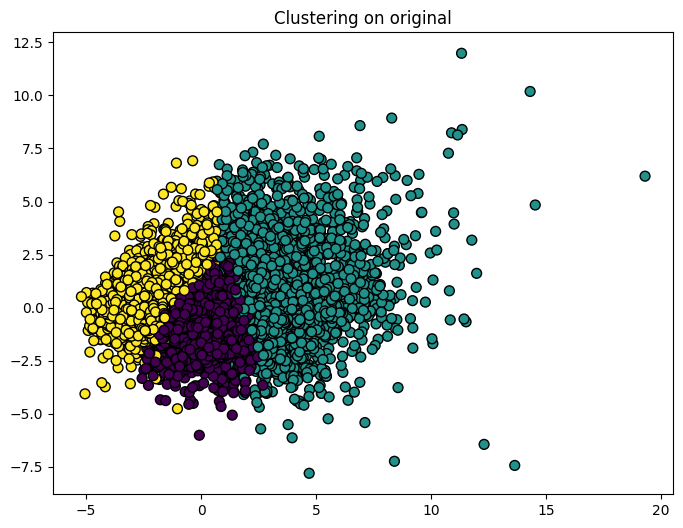

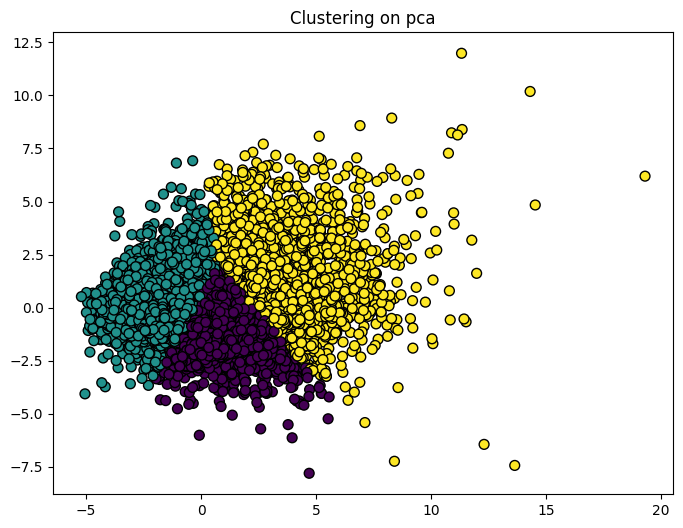

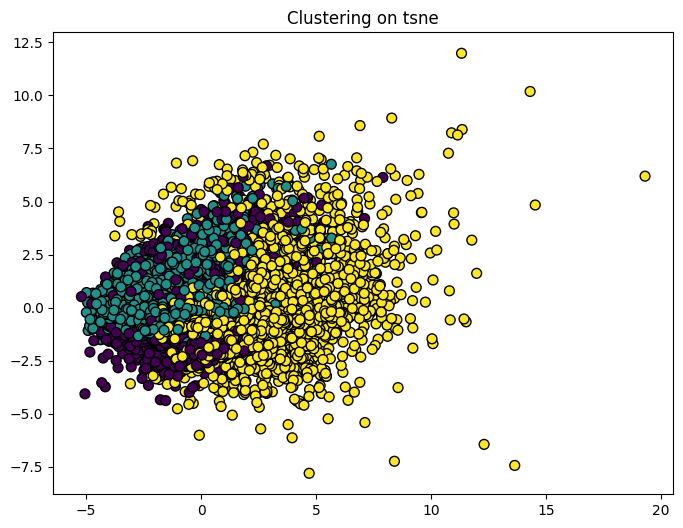

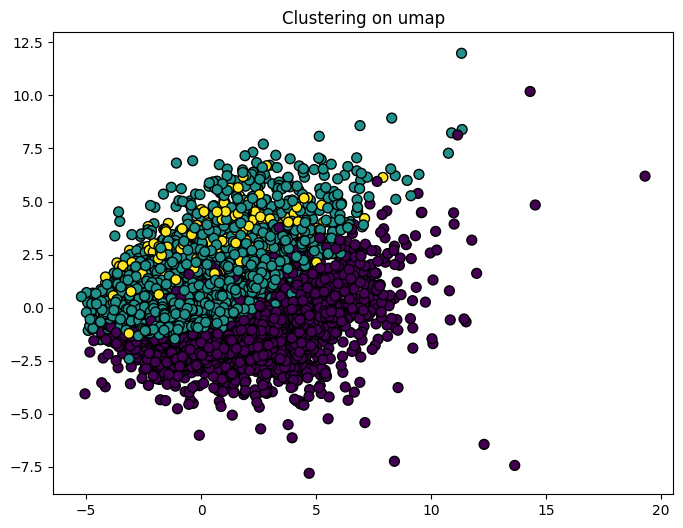

In [26]:
# Visualizaiton
for cluster_key, cluster_values in reduced_data.items():
    plt.figure(figsize=(8, 6))
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_values, cmap='viridis', edgecolor='k', s=50)
    plt.title(f'Clustering on {cluster_key}')
    plt.show()